This notebook consists of the python code that I used to further train the pre-trained DenseNet121 CNN Model.



In [ ]:
# Importing necessary libraries:
from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
# Defining the Path, where the folder or categories containing the images exist:
path = "/content/drive/My Drive/Models/Capstone II/data/more data"

data = ImageDataBunch.from_folder(path, size = 256, bs = 16,
                                  ds_tfms = get_transforms(flip_vert = False, max_warp= None,
                                                           max_zoom = 1, p_affine = 0 
                                                           ), valid_pct = 0.25)

In [ ]:
#Checking out the Classes:
data.classes

['Bianca Bosch or Olivia',
 'Carson White or Brad Evans',
 'Jacob Elordi or Noah',
 'Joel Courtney or Lee',
 'Joey King or Elle',
 'Maise Richardson-sellers or Chloe',
 'Meganne Young or Rachel',
 'Molly Ringwald known or Sara Flynn',
 'Morne Visser or Mr. Flynn',
 'Taylor Zakhar Perez or Marco']

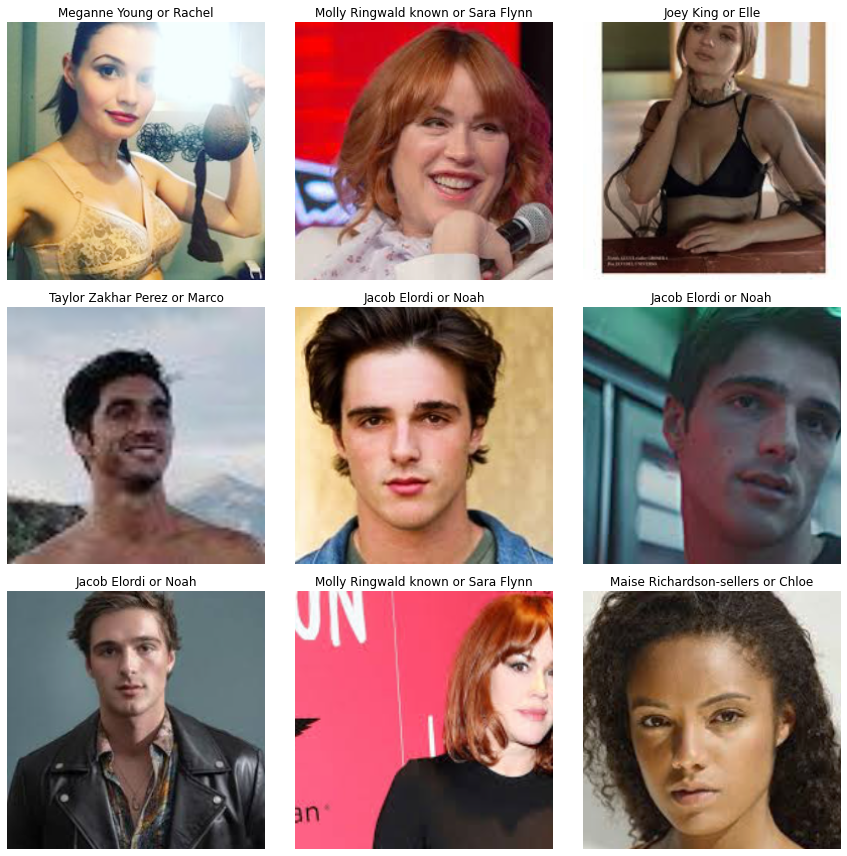

In [ ]:
# Taking a look at the images:
data.show_batch(3)

In [ ]:
# Setting up the learner, choosing the DenseNet121 Model:
learner = cnn_learner(data, models.densenet121, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
# Fitting it to the data for 10 Epochs:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.972032,0.820404,0.736014,09:03
1,1.086041,0.716740,0.807692,00:25
2,0.796496,0.558264,0.840909,00:25
3,0.618396,0.514717,0.844406,00:25
4,0.415435,0.455726,0.863636,00:25
5,0.330085,0.438365,0.888112,00:25
6,0.267552,0.371998,0.888112,00:25
7,0.175777,0.382380,0.896853,00:25
8,0.166382,0.381073,0.891608,00:25
9,0.152187,0.373486,0.896853,00:25


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


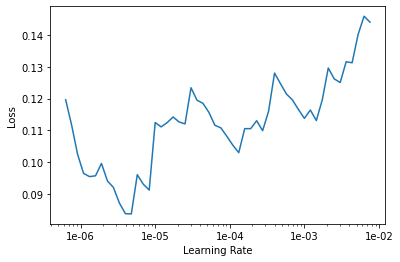

In [ ]:
# Using lr_find to find out the learning rate where the slope is the highest:
learner.lr_find()
learner.recorder.plot()

In [ ]:
# Training the model again but using momentum this time:
learner.fit_one_cycle(5, 1e-4, moms=(0.99, 0.89))

epoch,train_loss,valid_loss,accuracy,time
0,0.123753,0.367171,0.905594,00:25
1,0.118075,0.351554,0.909091,00:25
2,0.100320,0.341623,0.909091,00:25
3,0.101660,0.333440,0.916084,00:25
4,0.122602,0.345436,0.912587,00:25


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
# Saving the model for accessing it later:
learner.save('90%')

In [ ]:
# Training it one last time:
learner.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.113622,0.355385,0.910839,00:25
1,0.100831,0.341429,0.916084,00:25
2,0.109772,0.343154,0.909091,00:25
3,0.103157,0.341066,0.907343,00:25
4,0.111307,0.343964,0.909091,00:25
5,0.115864,0.333335,0.916084,00:25
6,0.102195,0.332272,0.912587,00:25
7,0.097745,0.347014,0.909091,00:25
8,0.097058,0.345723,0.914336,00:25
9,0.092758,0.341728,0.909091,00:25


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
# Exporting the model to where the data exists:
learner.export()